# Retraining MobileNet SSD v2 model using tenser flow 2 and object detection API

*READ INSTRUCTIONS CAREFULLY TO REPRODUCE WITH OTHER DATASETS*
```
- pipeline_confic = num of classes (5. Update Config For Transfer Learning)
- check latest checkpoint (por path pra ver)
```


1. **Structure:**

  Two githubs are used for the notebook. One is the *models* from tensor flow, whitch is going to be used in pair with the object detection API and training, and the other is the structure we need for our trainig (places to put dataset and so on)

2. **Label map:**

  First thing to change for the custom dataset is the label map. Change the variable *labels* in the *Create label map* section to corespond your labes.

  Example: 

  ```python
  labels = [{'name':'object_1', 'id':1}, {'name':'object_2', 'id':2}]
  ```

3. **Dataset:**

  You'll need to have the dataset in your google drive. After mounting your drive in the first cell of the *Get images and anotations from drive* section, change the root path of your dataset to match the current used dataset. 
  
  **Important about dataset**

  Please make sure your dataset follows these demands:
  - Pascal VOC format
  - already separated in two folders (test and train)
    - **Example:** 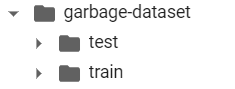


4. **Images for testing:**

  in the *Download dome images for testing the new model*, chance the links to some images from *Google* to download for test

After these changes, you can run all the cells to begin the execution of the notebook. once all cells are completed, a file `.tflite` with the new trained model will be downloaded.


Resources Used
- TFRecord Generator
 - https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py
- Setup 
  - https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

- Based on these 2 videos:
  - https://www.youtube.com/watch?v=IOI0o3Cxv9Q&t=1311s
  - https://www.youtube.com/watch?v=XoMiveY_1Z4&t=2448s


# 0. Setup Paths and some configs



In [ ]:
!git clone https://github.com/pfeinsper/RealTimeObjectDetection.git

Cloning into 'RealTimeObjectDetection'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 44 (delta 1), reused 0 (delta 0), pack-reused 27
Unpacking objects: 100% (44/44), done.


In [ ]:
WORKSPACE_PATH = '/content/RealTimeObjectDetection/Tensorflow/workspace'
SCRIPTS_PATH = '/content/RealTimeObjectDetection/Tensorflow/scripts'

APIMODEL_PATH = '/content/models'

ANNOTATION_PATH = WORKSPACE_PATH+'/annotations'
IMAGE_PATH = WORKSPACE_PATH+'/images'
MODEL_PATH = WORKSPACE_PATH+'/models'

PRETRAINED_MODEL_PATH = WORKSPACE_PATH+'/pre-trained-models'

# 1. Create Label Map

In [ ]:
labels = [{'name':"McDonald's logo", 'id':1}]

with open(ANNOTATION_PATH + '/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\"{}\"\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 1.1. Get images and anotations from drive

upload your intire dataset (images and labes in one folder) to your drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH_TO_DATASET = '/content/drive/MyDrive/Transfer\ Dataset/mc-dataset'

In [ ]:
!cp -r {PATH_TO_DATASET+'/train/*'} {IMAGE_PATH+'/train'}

In [ ]:
!cp -r {PATH_TO_DATASET+'/test/*'} {IMAGE_PATH+'/test'}

# 2. Config object detection API and clone tensorflow/models

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 65304, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 65304 (delta 155), reused 186 (delta 44), pack-reused 65000
Receiving objects: 100% (65304/65304), 575.49 MiB | 30.16 MiB/s, done.
Resolving deltas: 100% (45666/45666), done.


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 8.4 MB/s 
     |████████████████████████████████| 352 kB 27.0 MB/s 
     |████████████████████████████████| 1.8 MB 31.0 MB/s 
     |████████████████████████████████| 4.4 MB 28.9 MB/s 
     |████████████████████████████████| 596 kB 47.3 MB/s 
     |████████████████████████████████| 47.6 MB 37 kB/s 
     |████████████████████████████████| 1.2 MB 31.4 MB/s 
     |████████████████████████████████| 90 kB 9.5 MB/s 
     |████████████████████████████████| 99 kB 9.0 MB/s 
     |████████████████████████████████| 213 kB 45.4 

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2021-10-22 00:34:11.937059: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:34:12.331762: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:34:12.332619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-10-22 00:34:12.350473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

# 3. Create TF records

In [ ]:
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -x {IMAGE_PATH + '/train'} -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/train.record'}
!python {SCRIPTS_PATH + '/generate_tfrecord.py'} -x {IMAGE_PATH + '/test' } -l {ANNOTATION_PATH + '/label_map.pbtxt'} -o {ANNOTATION_PATH + '/test.record' }

Successfully created the TFRecord file: /content/RealTimeObjectDetection/Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: /content/RealTimeObjectDetection/Tensorflow/workspace/annotations/test.record


# 4. Copy Model Config to Training Folder

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 

In [ ]:
CHECKPOINT_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME

In [ ]:
!mkdir {MODEL_PATH+'/'+CUSTOM_MODEL_NAME}
!cp {PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'} {MODEL_PATH+'/'+CUSTOM_MODEL_NAME}

# 5. Update Config For Transfer Learning

In [ ]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [ ]:
CONFIG_PATH = MODEL_PATH+'/'+CUSTOM_MODEL_NAME+'/pipeline.config'

In [ ]:
config = config_util.get_configs_from_pipeline_file(CONFIG_PATH)

In [ ]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [ ]:
pipeline_config.model.ssd.num_classes = 1   # change this
pipeline_config.train_config.batch_size = 4

pipeline_config.train_config.fine_tune_checkpoint = PRETRAINED_MODEL_PATH+'/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"

pipeline_config.train_input_reader.label_map_path= ANNOTATION_PATH + '/label_map.pbtxt'

pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/train.record']
pipeline_config.eval_input_reader[0].label_map_path = ANNOTATION_PATH + '/label_map.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [ANNOTATION_PATH + '/test.record']

In [ ]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [ ]:
pipeline_config

model {
  ssd {
    num_classes: 1
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
 

# 6. Train the model

In [ ]:
TRAIN_STEPS = 5000
PRETRAINED_MODEL_DIR = '/content/RealTimeObjectDetection/Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'

In [ ]:
! python {APIMODEL_PATH}/research/object_detection/model_main_tf2.py --model_dir={CHECKPOINT_PATH} --pipeline_config_path={CONFIG_PATH} --num_train_steps={TRAIN_STEPS}

2021-10-22 00:34:59.530696: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:34:59.540446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:34:59.541290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:34:59.542836: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:34:59.543613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# 7. Testing the model

In [ ]:
cd /content/

/content


In [ ]:
mkdir img_for_test

In [ ]:
cd img_for_test

/content/img_for_test


##7.1 Download some images for testing the new model

In [ ]:
!wget http://f.i.uol.com.br/agora/galeria/images/13285393.jpeg

--2021-10-22 01:03:51--  http://f.i.uol.com.br/agora/galeria/images/13285393.jpeg
Resolving f.i.uol.com.br (f.i.uol.com.br)... 200.147.4.56, 2804:49c:4208:405:ffff:ffff:ffff:2, 2804:49c:3102:405:ffff:ffff:ffff:7, ...
Connecting to f.i.uol.com.br (f.i.uol.com.br)|200.147.4.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20449 (20K) [image/jpeg]
Saving to: ‘13285393.jpeg’

13285393.jpeg       100%[===================>]  19.97K  --.-KB/s    in 0.1s    

2021-10-22 01:03:52 (143 KB/s) - ‘13285393.jpeg’ saved [20449/20449]



In [ ]:
!wget http://privietrussia.blogfolha.uol.com.br/files/2018/04/WhatsApp-Image-2018-04-21-at-10.24.15-1024x576.jpeg

--2021-10-22 01:03:52--  http://privietrussia.blogfolha.uol.com.br/files/2018/04/WhatsApp-Image-2018-04-21-at-10.24.15-1024x576.jpeg
Resolving privietrussia.blogfolha.uol.com.br (privietrussia.blogfolha.uol.com.br)... 200.147.36.65, 200.147.100.48, 2804:49c:319:430::339
Connecting to privietrussia.blogfolha.uol.com.br (privietrussia.blogfolha.uol.com.br)|200.147.36.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved
Location: https://privietrussia.blogfolha.uol.com.br/files/2018/04/WhatsApp-Image-2018-04-21-at-10.24.15-1024x576.jpeg [following]
--2021-10-22 01:03:53--  https://privietrussia.blogfolha.uol.com.br/files/2018/04/WhatsApp-Image-2018-04-21-at-10.24.15-1024x576.jpeg
Connecting to privietrussia.blogfolha.uol.com.br (privietrussia.blogfolha.uol.com.br)|200.147.36.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111166 (109K) [image/jpeg]
Saving to: ‘WhatsApp-Image-2018-04-21-at-10.24.15-1024x576.jpeg’

WhatsApp-Image-2018 100%[====

##7.2 Export checkpoints and config into new model and test with downloaded images

In [ ]:
mkdir /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models

In [ ]:
mkdir /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --trained_checkpoint_dir /content/RealTimeObjectDetection/Tensorflow/workspace/models/my_ssd_mobnet --output_directory /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model

2021-10-22 00:52:25.987993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:52:25.999100: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:52:26.000745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:52:26.011413: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-22 00:52:26.012209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Loading model...Done! Took 20.946841955184937 seconds
Running inference for /content/img_for_test/WhatsApp-Image-2018-04-21-at-10.24.15-1024x576.jpeg... Done


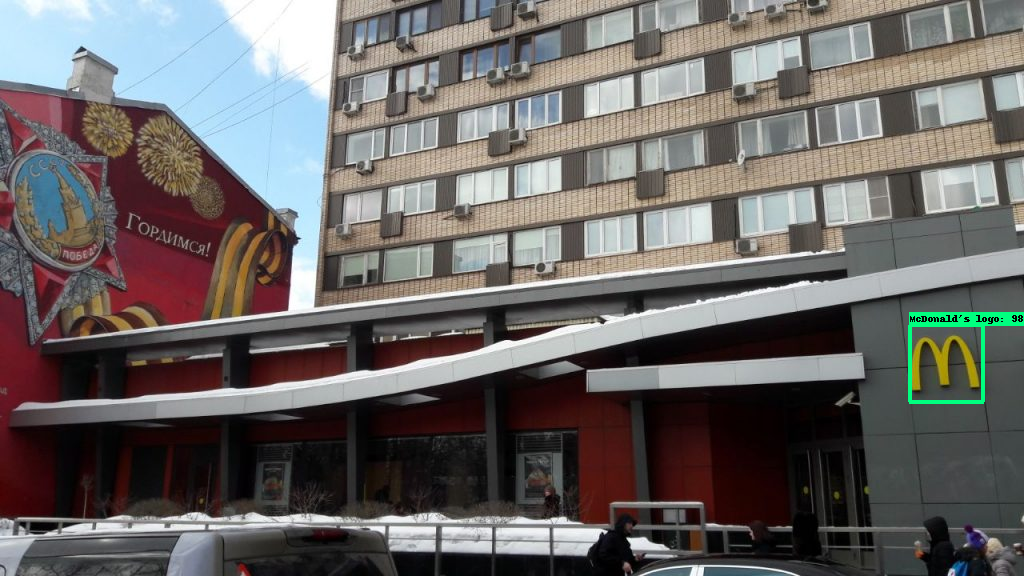

In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/img_for_test/WhatsApp-Image-2018-04-21-at-10.24.15-1024x576.jpeg'

# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/RealTimeObjectDetection/Tensorflow/workspace/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


# 8. Convert to TF Lite file

In [ ]:
cd /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models

/content/RealTimeObjectDetection/Tensorflow/workspace/exported_models


In [ ]:
mkdir my_model_graph

mkdir: cannot create directory ‘my_model_graph’: File exists


In [ ]:
c = "python /content/models/research/object_detection/export_tflite_graph_tf2.py \
    --pipeline_config_path /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model/pipeline.config \
    --trained_checkpoint_dir /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model/checkpoint \
    --output_directory /content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model_graph"

!{c}

W1022 01:06:02.464018 140073973286784 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f6510582790>, because it is not built.
W1022 01:06:02.762364 140073973286784 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x7f65104c4f10>, because it is not built.
W1022 01:06:02.762679 140073973286784 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x7f649d7c3ad0>, because it is not built.
W1022 01:06:02.762871 140073973286784 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.core.Lambda object at 0x7f649d7bd350>, because it is not built.
W1022 01:06:02.763041 140073973286784 save_impl.py:72] Skipping full serialization of Keras layer <keras.layers.convolutional.SeparableConv2D object at 0x7f65101bd050>, because it is not built.
W1022 01:0

In [ ]:
!tflite_convert --output_file model2.tflite --saved_model_dir my_model_graph/saved_model

In [ ]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/RealTimeObjectDetection/Tensorflow/workspace/exported_models/my_model_graph/saved_model/') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model1.tflite', 'wb') as f:
  f.write(tflite_model)

##8.1 Compile for Edge TPU usage

In [ ]:
pwd

'/content/RealTimeObjectDetection/Tensorflow/workspace/exported_models'

In [ ]:
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k
OK


In [ ]:
!echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

deb https://packages.cloud.google.com/apt coral-edgetpu-stable main


In [ ]:
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:15 http://archive.ubuntu.com/ubunt

In [ ]:
!sudo apt-get install edgetpu-compiler

Reading package lists... Done
Building dependency tree       
Reading state information... Done
edgetpu-compiler is already the newest version (16.0).
0 upgraded, 0 newly installed, 0 to remove and 68 not upgraded.


In [ ]:
!edgetpu_compiler model1.tflite
print("\n--\n")
!edgetpu_compiler model2.tflite

Edge TPU Compiler version 16.0.384591198
Started a compilation timeout timer of 180 seconds.

Model compiled successfully in 44 ms.

Input model: model1.tflite
Input size: 10.96MiB
Output model: model1_edgetpu.tflite
Output size: 10.96MiB
On-chip memory used for caching model parameters: 0.00B
On-chip memory remaining for caching model parameters: 0.00B
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 0
Total number of operations: 155
Operation log: model1_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 0
Number of operations that will run on CPU: 155
See the operation log file for individual operation details.
Compilation child process compl

#9. Download model ready for use

In [ ]:
# from google.colab import files
# files.download('final_model_edgetpu.tflite')